In [1]:
import numpy as np
import matplotlib.pyplot as plt
import zlib
import gzip
import bz2
import lzma
import time


In [2]:
def generate_binomial_binary_file(N, p):
    """
    Generate a binary file with binomial distribution.
    
    Args:
    N (int): Number of bits to generate
    p (float): Probability of 1
    
    Returns:
    bytes: Generated binary data
    """
    # Generate binary data using numpy
    binary_data = np.random.binomial(1, p, N)
    
    # Convert to bytes
    byte_data = np.packbits(binary_data)
    
    return byte_data

In [3]:
def calculate_entropy(p):
    """
    Calculate binary entropy for a given probability.
    
    Args:
    p (float): Probability of 1
    
    Returns:
    float: Entropy in bits
    """
    if p == 0 or p == 1:
        return 0
    return -(p * np.log2(p) + (1-p) * np.log2(1-p))

In [4]:
def analyze_entropy_and_compression(N=1000000*8):
    """
    Generate binary files for different probabilities,
    calculate entropy and file sizes using multiple methods, and record compression times.
    
    Args:
    N (int): Number of bits to generate
    
    Returns:
    tuple: Lists of probabilities, entropies, and file sizes for different methods, and compression times
    """
    # Compression methods to compare
    compression_methods = {
        'zlib': zlib.compress,
        'gzip': gzip.compress,
        'bz2': bz2.compress,
        'lzma': lzma.compress
    }

    # Generate probabilities from 0 to 1 with 0.05 step
    probabilities = np.arange(0, 1.01, 0.02)

    # Lists to store results
    entropies = []
    original_sizes = []
    compressed_sizes = {method: [] for method in compression_methods}
    compression_times = {method: [] for method in compression_methods}
    
    for p in probabilities:
        # Generate binary file
        binary_data = generate_binomial_binary_file(N, p)
        
        # Calculate entropy
        entropy = N * calculate_entropy(p)
        entropies.append(entropy)
        
        # Calculate original file size
        original_sizes.append(len(binary_data) * 8)
        
        # Calculate compressed file sizes and times for different methods
        for method_name, compress_func in compression_methods.items():
            start_time = time.perf_counter()
            compressed_data = compress_func(binary_data)
            end_time = time.perf_counter()
            
            compressed_sizes[method_name].append(len(compressed_data) * 8)
            compression_times[method_name].append(end_time - start_time)
    
    return probabilities, entropies, original_sizes, compressed_sizes, compression_times



In [5]:
def plot_results():
    """
    Plot entropy, file sizes, and compression times against probabilities for multiple compression methods.
    """
    # Generate data
    probabilities, entropies, original_sizes, compressed_sizes, compression_times = analyze_entropy_and_compression()
    
    # Create a figure for sizes
    plt.figure(figsize=(14, 10))
    
    # Plot Entropy
    plt.plot(probabilities, entropies, 'k-', linewidth=3, label='Entropy')
    
    # Plot original file size
    plt.plot(probabilities, original_sizes, 'gray', linestyle='--', label='Original File Size')
    
    # Plot compressed file sizes for different methods
    colors = ['blue', 'red', 'green', 'purple']
    linestyles = ['-', '--', '-.', ':']
    
    for (method, sizes), color, linestyle in zip(compressed_sizes.items(), colors, linestyles):
        plt.plot(probabilities, sizes, color=color, linestyle=linestyle, label=f'{method} Compressed Size')
    
    plt.xlabel('Probability (p)')
    plt.ylabel('Size (bits)')
    plt.title('Entropy, Original, and Compressed File Sizes vs. Probability')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Create a figure for compression times
    plt.figure(figsize=(14, 10))
    
    for (method, times), color, linestyle in zip(compression_times.items(), colors, linestyles):
        plt.plot(probabilities, times, color=color, linestyle=linestyle, label=f'{method} Compression Time')
    
    plt.xlabel('Probability (p)')
    plt.ylabel('Time (seconds)')
    plt.title('Compression Times vs. Probability')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the plot

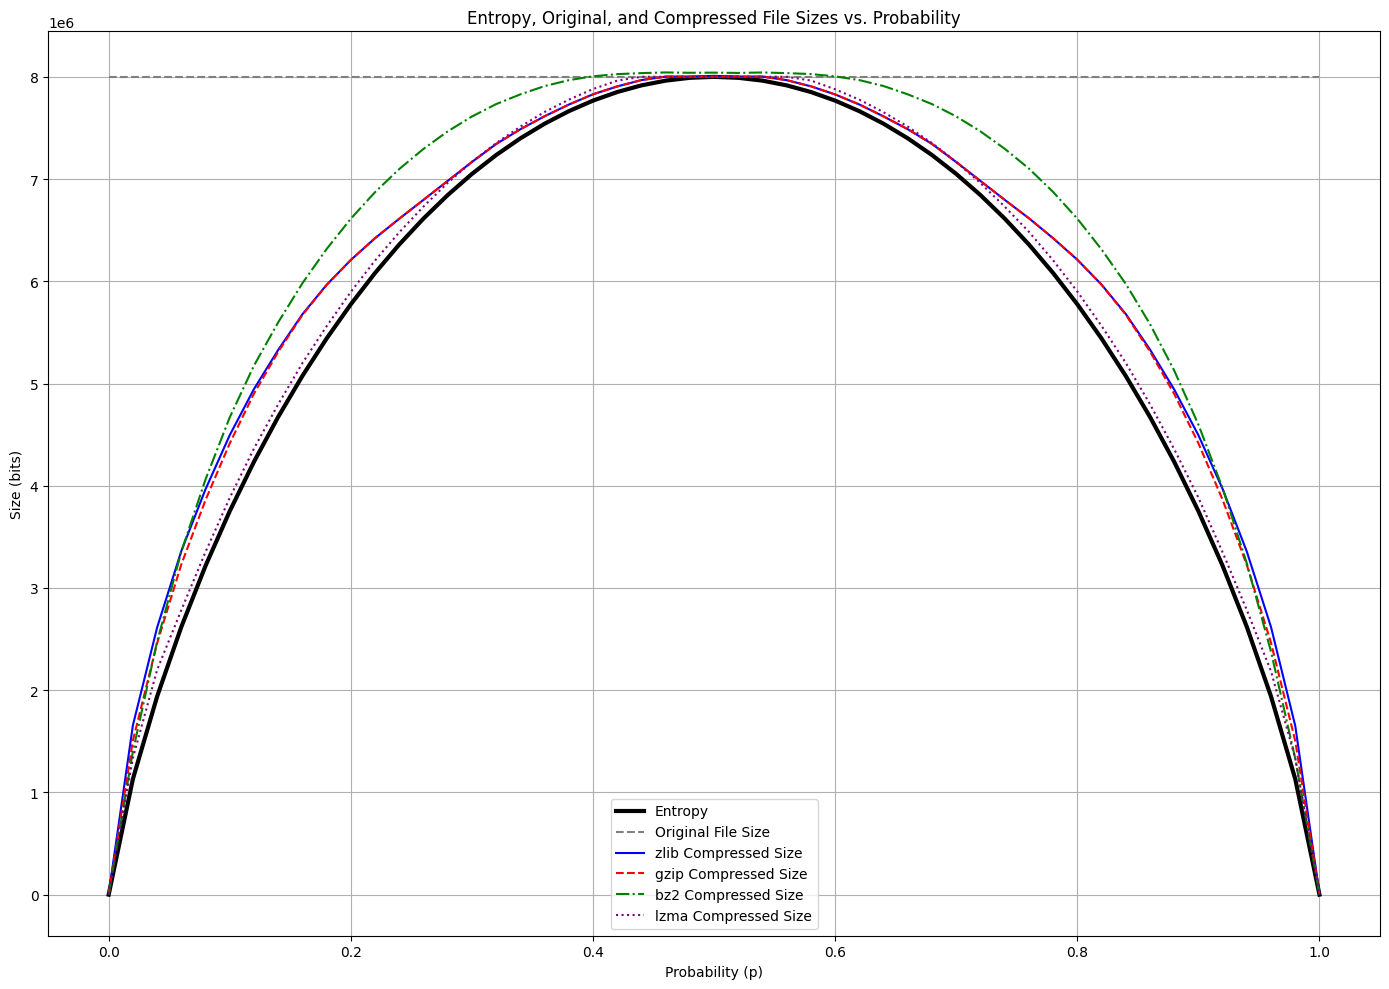

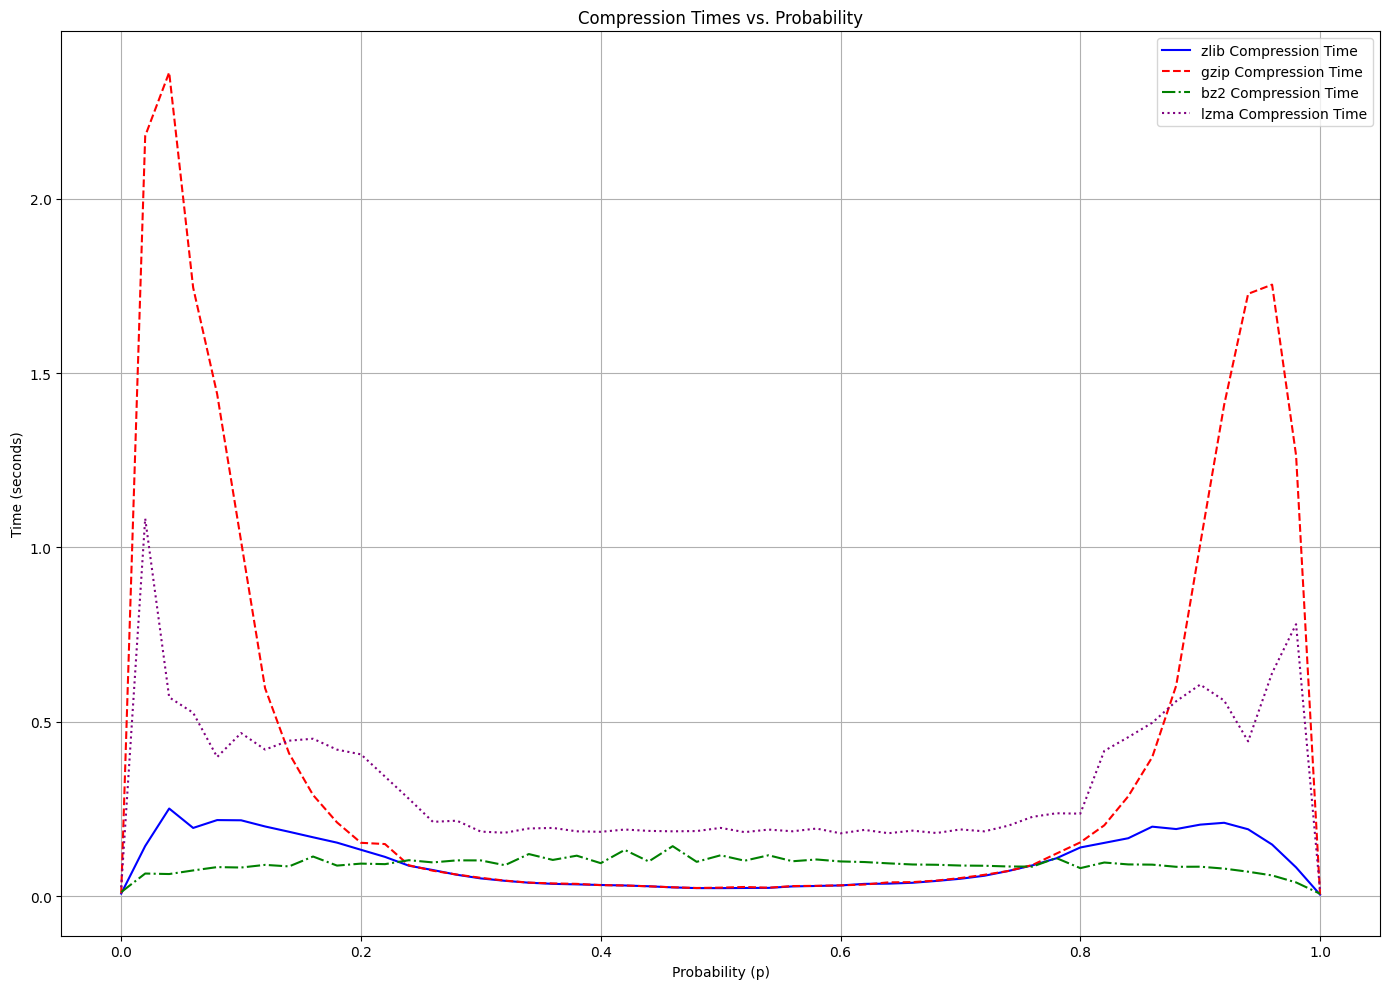

In [6]:
plot_results()